67692 67692 131
22688 22688 131 131


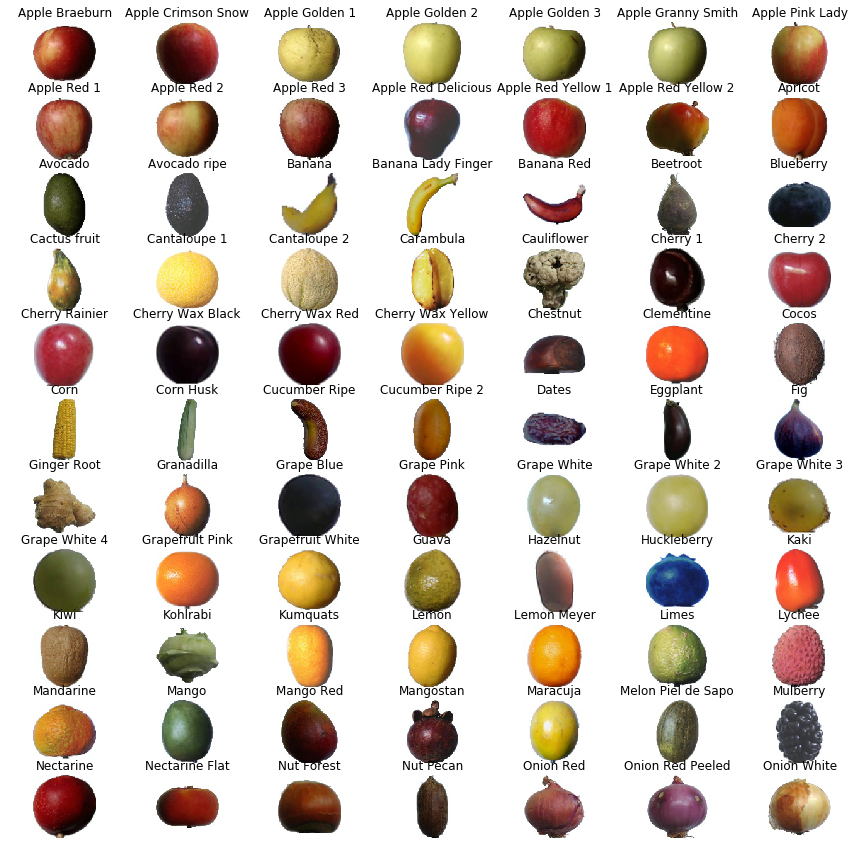

(?, 80000)
Epoch: 0001 cost= 3877296128.000000000 Training accuracy 0.10938
Epoch: 0001 cost= 3240379392.000000000 Training accuracy 0.10156
Epoch: 0001 cost= 2856842240.000000000 Training accuracy 0.10938
Epoch: 0001 cost= 2864923904.000000000 Training accuracy 0.11719
Epoch: 0001 cost= 2434855936.000000000 Training accuracy 0.14844
Epoch: 0001 cost= 2137089408.000000000 Training accuracy 0.17969
Epoch: 0001 cost= 1988279808.000000000 Training accuracy 0.17969
Epoch: 0001 cost= 1868630016.000000000 Training accuracy 0.20312
Epoch: 0001 cost= 1363677952.000000000 Training accuracy 0.25000
Epoch: 0001 cost= 1361626368.000000000 Training accuracy 0.24219
Epoch: 0001 cost= 1150758656.000000000 Training accuracy 0.28906
Epoch: 0001 cost= 1136489728.000000000 Training accuracy 0.28906
Epoch: 0001 cost= 1085375232.000000000 Training accuracy 0.31250
Epoch: 0001 cost= 1032514560.000000000 Training accuracy 0.30469
Epoch: 0001 cost= 930737152.000000000 Training accuracy 0.30469
Epoch: 0001 cos

Epoch: 0002 cost= 35372384.000000000 Training accuracy 0.91406
Epoch: 0002 cost= 30964348.000000000 Training accuracy 0.87500
Epoch: 0002 cost= 15664394.000000000 Training accuracy 0.95312
Epoch: 0002 cost= 30283550.000000000 Training accuracy 0.88281
Epoch: 0002 cost= 30995264.000000000 Training accuracy 0.91406
Epoch: 0002 cost= 11489470.000000000 Training accuracy 0.96094
Epoch: 0002 cost= 26465782.000000000 Training accuracy 0.90625
Epoch: 0002 cost= 21136480.000000000 Training accuracy 0.92188
Epoch: 0002 cost= 27805804.000000000 Training accuracy 0.90625
Epoch: 0002 cost= 29576146.000000000 Training accuracy 0.91406
Epoch: 0002 cost= 13477811.000000000 Training accuracy 0.93750
Epoch: 0002 cost= 35643340.000000000 Training accuracy 0.86719
Epoch: 0002 cost= 25346534.000000000 Training accuracy 0.92188
Epoch: 0002 cost= 15247378.000000000 Training accuracy 0.92969
Epoch: 0002 cost= 20697482.000000000 Training accuracy 0.92969
Epoch: 0002 cost= 11439762.000000000 Training accuracy 

Epoch: 0004 cost= 5781526.500000000 Training accuracy 0.96094
Epoch: 0004 cost= 5991900.500000000 Training accuracy 0.94531
Epoch: 0004 cost= 10443957.000000000 Training accuracy 0.95312
Epoch: 0004 cost= 7309755.500000000 Training accuracy 0.96094
Epoch: 0004 cost= 16592620.000000000 Training accuracy 0.94531
Epoch: 0004 cost= 6290466.500000000 Training accuracy 0.96875
Epoch: 0004 cost= 8344438.500000000 Training accuracy 0.96875
Epoch: 0004 cost= 3768597.000000000 Training accuracy 0.96875
Epoch: 0004 cost= 6194264.000000000 Training accuracy 0.96875
Epoch: 0004 cost= 5918851.000000000 Training accuracy 0.97656
Epoch: 0004 cost= 5137242.500000000 Training accuracy 0.97656
Epoch: 0004 cost= 3398717.000000000 Training accuracy 0.95312
Epoch: 0004 cost= 5963651.000000000 Training accuracy 0.97656
Epoch: 0004 cost= 5774035.000000000 Training accuracy 0.96094
Epoch: 0004 cost= 2430765.000000000 Training accuracy 0.98438
Epoch: 0004 cost= 7408555.500000000 Training accuracy 0.96875
Epoch:

In [2]:
##1.数据采集
##导包
import os
import skimage
import numpy as np
import matplotlib.pyplot as plt
from skimage import color,data,transform
from sklearn.utils import shuffle
import keras
from keras.utils import np_utils
##将当前路径改为图集文件路径
##改变当前路径
os.chdir('D://素材库//fruits-360')
##读图函数
##获取对应路径文件夹下的图片数据
def load_data(dir_path):
    images=[] ##新建一个空列表用于存放图片数集
    labels=[] ##新建一个空列表用于存放标签数集
    no5_imgs=[] ##新建一个空列表用于存放每个文件夹下的第五张图片
    labels_no5=[] ##新建一个空列表用于存放第五张图片对应的文件夹名
    lab=os.listdir(dir_path)
    n=0
    for l in lab:
        img=os.listdir(dir_path+l) ##img为对应路径下的文件夹
        for i in img:
            img_path=dir_path+l+'/'+i ##是的话获取图片路径
            labels.append(int(n)) ##将外循环的迭代数n存于labels中
            images.append(skimage.data.imread(img_path)) ##读取对应路径图像存放于datasets中
        n+=1
        no5_img=format_path(img) ##将图片按正确顺序排列一下，便于取得第5张图片
        img5_path=dir_path+l+'/'+no5_img
        labels_no5.append(l)
        no5_imgs.append(skimage.data.imread(img5_path)) ##将每个类别的第五张图片读出后存放于数据集no5_imgs中
    return images,labels,no5_imgs,labels_no5 ##返回的images内的图片存放顺序与实际文件夹中存放的顺序不同
##用于顺序读取文件夹内文件的函数
def format_path(img):  ##img为 os.listdir(标签文件夹) 的结果    
    yes_int=[] ##新建列表用于存放分割后的第一项可转化为整型的文件名
    for s in range(len(img)): ##遍历
        img[s] = img[s].split('_') ##把文件名以'_'为间隔符分开
        if(is_number(img[s][0])): ##判断文件名分割后的第一部分能否转化为整型
            img[s][0]=int(img[s][0]) ##把文件名第一部分转换为整数
            yes_int.append(img[s]) ##将该文件名放到没有带r的列表中
    yes_int.sort() ##可以转化为整型的文件名的列表进行排序
    for yi in range(len(yes_int)): ##变量
        yes_int[yi][0]=str(yes_int[yi][0]) ##把之前转为整型的部分再转回字符串
        yes_int[yi]=yes_int[yi][0]+'_'+yes_int[yi][1] ##进行拼接
    no5_img=yes_int[4]
    return no5_img
##判断一个一个数据是否能够转换为整形
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
 
    try:
        import unicodedata
        unicodedata.numeric(s)
        return True
    except (TypeError, ValueError):
        pass
 
    return False
##最终数据集与标签
images,labels,no5_imgs,labels_no5=load_data('./Training/')
print(len(images),len(labels),len(no5_imgs))
##最终测试数据集与标签
images_test,labels_test,no5_imgs_test,labels_no5=load_data('./Test/')##做了修改，加了labels_no5
print(len(images_test),len(labels_test),len(no5_imgs_test),len(labels_no5))
      
##2.数据可视化
##定义第5张图片可视化函数
def display_no5_img(no5_imgs,labels_no5):
    fig = plt.figure(figsize=(15,15)) ##显示的尺寸为15*15
    for i in range(0,77):  ##修改前为for i in range(len(no5_imgs))
        plt.subplot(11,7,(i+1)) ##显示为11行，每行7个
        plt.title("{0}".format(labels_no5[i])) ##显示标题
        plt.imshow(no5_imgs[i])  ##显示图片
        plt.axis('off') ##不显示坐标轴
    plt.show()
##调用显示函数
display_no5_img(no5_imgs,labels_no5) 

##3.数据预处理
##由于数据集过大,先加载小部分进行训练，n代表几个类
def load_small_data(dir_path,m):
    images_m=[] ##新建一个空列表用于存放图片数集
    labels_m=[] ##新建一个空列表用于存放标签数集
    lab=os.listdir(dir_path)
    n=0
    for l in lab:
        if(n>=m):
            break
        img=os.listdir(dir_path+l) ##img为对应路径下的文件夹
        for i in img:
            img_path=dir_path+l+'/'+i ##是的话获取图片路径
            labels_m.append(int(n)) ##将图片的上层文件夹转换为int类型存于labels中
            images_m.append(skimage.data.imread(img_path)) ##读取对应路径图像存放于images_m中
        n+=1
    return images_m,labels_m ## m类标签以及数据
images_20,labels_20=load_small_data('./Training/',20) ##训练集
images_test_20,labels_test_20=load_small_data('./Test/',20) ##测试集

##预处理数据函数（数组化，乱序）
def prepare_data(images,labels,n_classes):
    ##images64=cut_image(images,64,64) ##裁剪图片大小为64*64
    train_x=np.array(images)
    train_y=np.array(labels)
    ##images_gray=color.rgb2gray(images_a) ##转灰度
    indx=np.arange(0,train_y.shape[0])
    indx=shuffle(indx)
    train_x=train_x[indx]
    train_y=train_y[indx]
    train_y=keras.utils.to_categorical(train_y,n_classes) ##one-hot独热编码
    return train_x,train_y
##训练集数据预处理
train_x,train_y=prepare_data(images_20,labels_20,20)
##测试数据集与标签的数组化和乱序
test_x,test_y=prepare_data(images_test_20,labels_test_20,20)
##4.Tensorflow卷积神经网络的搭建
import tensorflow as tf
## 配置神经网络的参数
n_classes=20 ##数据的类别数
batch_size=128 ##训练块的大小
kernel_h=kernel_w=5 ##卷积核尺寸
dropout=0.8 ##dropout的概率
depth_in=3 ##图片的通道数
depth_out1=64 ##第一层卷积的卷积核个数
depth_out2=128 ##第二层卷积的卷积核个数
image_size=train_x.shape[1] ##图片尺寸
n_sample=train_x.shape[0] ##训练样本个数
t_sample=test_x.shape[0] ##测试样本个数
 
##feed给神经网络的图像数据类型与shape,四维，第一维训练的数据量，第二、三维图片尺寸，第四维图像通道数
with tf.name_scope('input'):
    x=tf.placeholder(tf.float32,[None,100,100,3]) 
    y=tf.placeholder(tf.float32,[None,n_classes]) ##feed到神经网络的标签数据的类型和shape
keep_prob=tf.placeholder(tf.float32) ##dropout的placeholder(解决过拟合)
fla=int((image_size*image_size/16)*depth_out2) ##用于扁平化处理的参数经过两层卷积池化后的图像大小*第二层的卷积核个数
##定义各卷积层和全连接层的权重变量
Weights={"con1_w":tf.Variable(tf.random_normal([kernel_h,kernel_w,depth_in,depth_out1])),\
         "con2_w":tf.Variable(tf.random_normal([kernel_h,kernel_w,depth_out1,depth_out2])),\
         "fc_w1":tf.Variable(tf.random_normal([int((image_size*image_size/16)*depth_out2),1024])),\
         "fc_w2":tf.Variable(tf.random_normal([1024,512])),\
         "out":tf.Variable(tf.random_normal([512,n_classes]))}

 
##定义各卷积层和全连接层的偏置变量
bias={"conv1_b":tf.Variable(tf.random_normal([depth_out1])),\
      "conv2_b":tf.Variable(tf.random_normal([depth_out2])),\
      "fc_b1":tf.Variable(tf.random_normal([1024])),\
      "fc_b2":tf.Variable(tf.random_normal([512])),\
      "out":tf.Variable(tf.random_normal([n_classes]))}
## 定义卷积层的生成函数
def conv2d(x,W,b,stride=1):
    x=tf.nn.conv2d(x,W,strides=[1,stride,stride,1],padding="SAME")
    x=tf.nn.bias_add(x,b)
    return tf.nn.relu(x)
 
## 定义池化层的生成函数
def maxpool2d(x,stride=2):
    return tf.nn.max_pool(x,ksize=[1,stride,stride,1],strides=[1,stride,stride,1],padding="SAME")
 
## 定义卷积神经网络生成函数
def conv_net(x,weights,biases,dropout):
    
    ## Convolutional layer 1(卷积层1)
    conv1 = conv2d(x,Weights['con1_w'],bias['conv1_b']) ##100*100*64
    conv1 = maxpool2d(conv1,2) ##经过池化层1 shape：50*50*64
     
    ## Convolutional layer 2（卷积层2）
    conv2 = conv2d(conv1,Weights['con2_w'],bias['conv2_b']) ##50*50*128
    conv2 = maxpool2d(conv2,2) ##经过池化层2 shape:25*25*128
    ## Fully connected layer 1(全连接层1)
    flatten = tf.reshape(conv2,[-1,fla]) ##Flatten层，扁平化处理
    fc1 = tf.add(tf.matmul(flatten,Weights['fc_w1']),bias['fc_b1'])
    fc1 = tf.nn.relu(fc1) ##经过relu激活函数
    print(flatten.get_shape())
    ## Fully connected layer 2(全连接层2)
    fc2 = tf.add(tf.matmul(fc1,Weights['fc_w2']),bias['fc_b2']) ##计算公式：输出参数=输入参数*权值+偏置
    fc2 = tf.nn.relu(fc2) ##经过relu激活函数
    
    ## Dropout（Dropout层防止预测数据过拟合）
    fc2 = tf.nn.dropout(fc2,dropout)
    ## Output class prediction
    prediction = tf.add(tf.matmul(fc2,Weights['out']),bias['out']) ##输出预测参数
    return prediction
##5.优化器
## 优化预测准确率
prediction=conv_net(x,Weights,bias,keep_prob) ##生成卷积神经网络
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction,labels=y)) ##交叉熵损失函数##修改去掉v2
optimizer=tf.train.AdamOptimizer(0.0009).minimize(cross_entropy) ##选择优化器以及学习率
##optimizer=tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)
##optimizer=tf.train.AdagradOptimizer(0.001).minimize(cross_entropy) ##选择优化器以及学习率
 
## 评估模型
with tf.name_scope('accuracy'):
    correct_pred=tf.equal(tf.argmax(prediction,1),tf.argmax(y,1))
    accuracy=tf.reduce_mean(tf.cast(correct_pred,tf.float32))
##训练块数据生成器
def gen_small_data(inputs,batch_size):
    i=0
    while True:
        small_data=inputs[i:(batch_size+i)]
        i+=batch_size
        yield small_data
##6.训练
## 初始会话并开始训练过程
with tf.Session() as sess:
    tf.global_variables_initializer().run()   
    for  i  in range(5):
        train_x,train_y=prepare_data(images_20,labels_20,20) ##重新预处理数据
        train_x=gen_small_data(train_x,batch_size) ##生成图像块数据
        train_y=gen_small_data(train_y,batch_size) ##生成标签块数据
        for j in range(int(n_sample/batch_size)+1):
            x_=next(train_x) 
            y_=next(train_y)
            ##准备验证数据
            validate_feed={x:x_,y:y_,keep_prob:0.8}
            if i % 1 == 0:
                sess.run(optimizer, feed_dict=validate_feed)
                loss,acc = sess.run([cross_entropy,accuracy],feed_dict={x:x_,y:y_,keep_prob:0.8})
                print("Epoch:", '%04d' % (i+1),"cost=", "{:.9f}".format(loss),"Training accuracy","{:.5f}".format(acc))
    print('Optimization Completed')
    ##准备测试数据
    test_x=test_x[0:400]
    test_y=test_y[0:400]
    test_feed={x:test_x,y:test_y,keep_prob: 0.8} 
    y1 = sess.run(prediction,feed_dict=test_feed)
    test_classes = np.argmax(y1,1)
    print('Testing Accuracy:',sess.run(accuracy,feed_dict=test_feed))
    saver=tf.train.Saver()
    saver.save(sess,"/model_1/model_1.ckpt")
    print('模型已保存')